# **Digital Image Processing (EE-433) - Lab #10**

***Morphological Image Processing***

Name: Muhammad Saad Tariq

Cms: 224921

Class: BSCS-7A

Original Image:


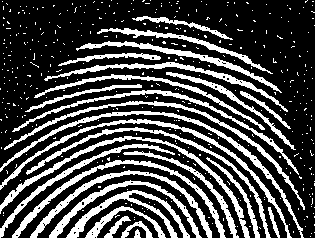


Image after Erosion:


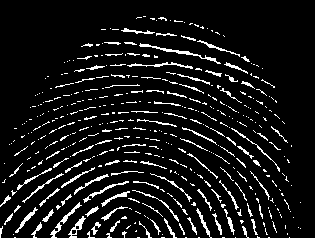

In [0]:
########## Task1 - custom morphological erode operation ##########
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#CREATING EROSION FUNCTION
def erode(inp, s_e, bg, startV, endV ,startH, endH, step, md):
  step_h = s_e.shape[0]
  step_w = s_e.shape[1]
  for i in range(startV, endV, step):
    for j in range(startH, endH, step):
      check = 0
      for x in range(0,step_h):
        for y in range(0,step_w):
          if md == 0:
            if inp[(i+x),(j+y)] == s_e[x,y]:
              check += 1
          elif md == 1:
            if inp[(i-x),(j-y)] == s_e[x,y]:
              check += 1
      #check for FIT principle
      if check != (step_h*step_w):
        inp[i,j] = bg
  return inp

img = cv2.imread('fp.tif', 0)
h = int(img.shape[0])
w = int(img.shape[1])
print('Original Image:')
cv2_imshow(img)

#create a structuring element
SE = np.ones([3,3])
SE *= 255
step_h = int(SE.shape[0])
step_w = int(SE.shape[1])
temp = np.copy(img)

#define background pixel value [black(0) or white(255)]
bgcl = 0

#call function
eroded = erode(temp, SE, bgcl, 0, (h-step_h), 0, (w-step_w), 1, 0)

#to cater last rows and columns
eroded = erode(eroded, SE, bgcl, (h-1), 0, (w-1), (w-step_w-1), -1, 1)
eroded = erode(eroded, SE, bgcl, (h-1), (h-step_h-1), (w-1), 0, -1, 1)

print('\nImage after Erosion:')
cv2_imshow(eroded)

Original Image:


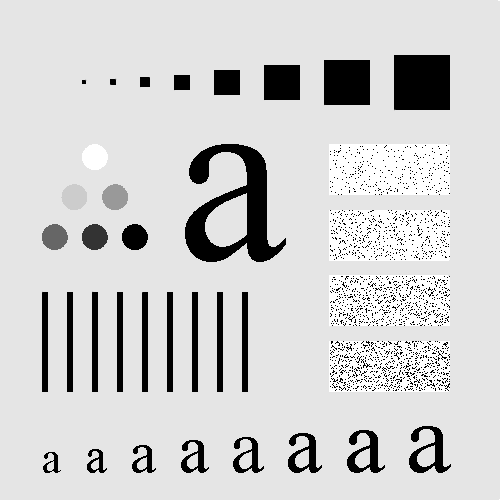


Image after Erosion:


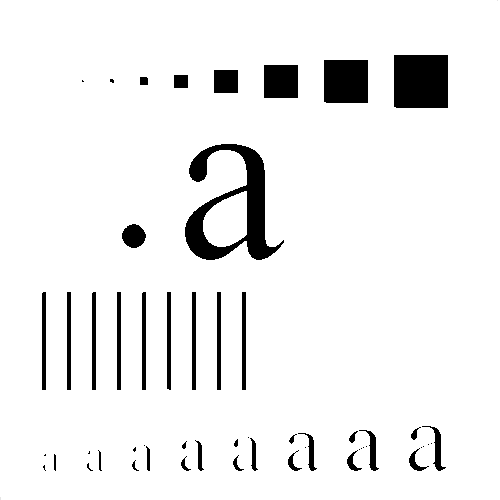

In [0]:
############### Erosion on Fig01.tif (uses erode function from last cell) ###############
# *********** Taking black as foreground and white as background***********

#Effect expected: Only regions with majority black pixels will remain otherwise white background will expand - 
#the rectangular boxes will become all white and become part of background, and the smaller boxes in top strip of increasing black boxes will also fade away 

img = cv2.imread('Fig01.tif', 0)
h = int(img.shape[0])
w = int(img.shape[1])
print('Original Image:')
cv2_imshow(img)

#create a structuring element
SE = np.ones([3,3])
SE *= 0
step_h = int(SE.shape[0])
step_w = int(SE.shape[1])
test = np.copy(img)

#define background as white(255)
bgcl = 255

#call function
eroded = erode(test, SE, bgcl, 0, (h-step_h), 0, (w-step_w), 1, 0)

#to cater last rows and columns
eroded = erode(eroded, SE, bgcl, (h-1), 0, (w-1), (w-step_w-1), -1, 1)
eroded = erode(eroded, SE, bgcl, (h-1), (h-step_h-1), (w-1), 0, -1, 1)

print('\nImage after Erosion:')
cv2_imshow(eroded)


Original Image:


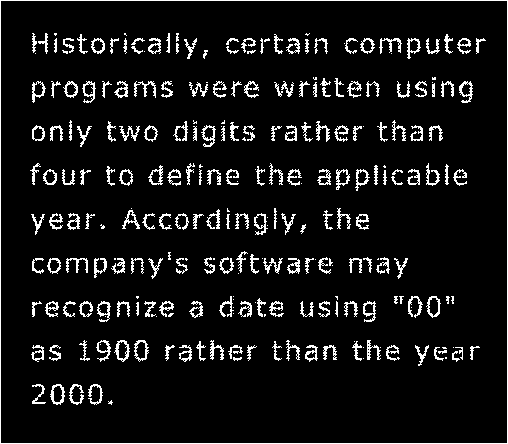


Image after Dilation:


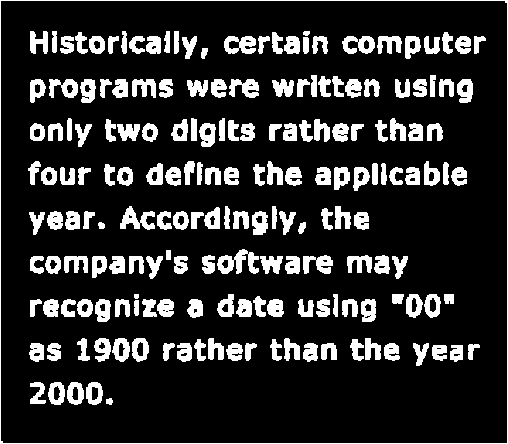

In [0]:
########## Task2 - custom morphological dilate operation ##########
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#CREATING DILATION FUNCTION
def dilate(inp, s_e, fg, startV, endV ,startH, endH, step, md):
  step_h = s_e.shape[0]
  step_w = s_e.shape[1]
  for i in range(startV, endV, step):
    for j in range(startH, endH, step):
      check = 0
      for x in range(0,step_h):
        for y in range(0,step_w):
          if md == 0:
            if inp[(i+x),(j+y)] == s_e[x,y]:
              check += 1
          elif md == 1:
            if inp[(i-x),(j-y)] == s_e[x,y]:
              check += 1
      #check for HIT principle
      if check >= 1:
        inp[i,j] = fg
  return inp


img = cv2.imread('broken_text.tif', 0)
h = int(img.shape[0])
w = int(img.shape[1])
print('Original Image:')
cv2_imshow(img)

#create a structuring element
SE = np.ones([3,3])
SE *= 255
step_h = int(SE.shape[0])
step_w = int(SE.shape[1])
temp = np.copy(img)

#define foreground as white(255)
fgcl = 255

#call function
dilated = dilate(temp, SE, fgcl, 0, (h-step_h), 0, (w-step_w), 1, 0)

#to cater last rows and columns
dilated = dilate(dilated, SE, fgcl, (h-1), 0, (w-1), (w-step_w-1), -1, 1)
dilated = dilate(dilated, SE, fgcl, (h-1), (h-step_h-1), (w-1), 0, -1, 1)

print('\nImage after Dilation:')
cv2_imshow(dilated)

Original Image:


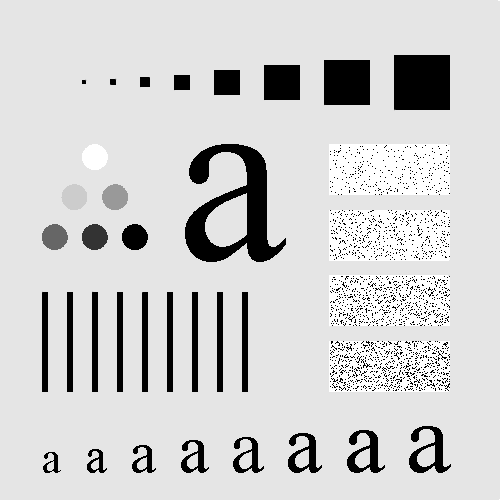


Image after Dilation:


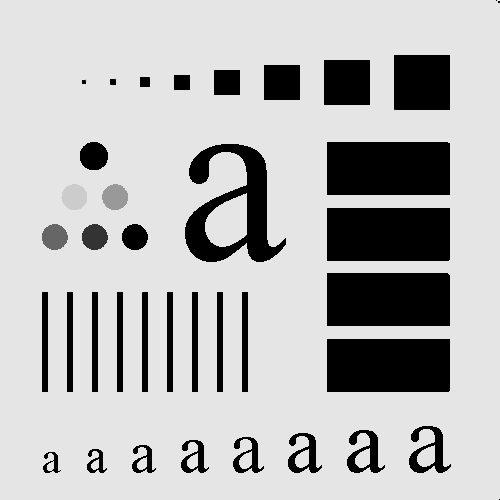

In [0]:
############### Dilation on Fig01.tif (uses dilate function from last cell) ###############
# *********** Taking black as foreground and white as background***********

#Effect expected: All black regions will expand and the rectangular boxes will be completely filled with black
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('Fig01.tif', 0)
h = int(img.shape[0])
w = int(img.shape[1])
print('Original Image:')
cv2_imshow(img)

#create a structuring element
SE = np.ones([3,3])
SE *= 255
step_h = int(SE.shape[0])
step_w = int(SE.shape[1])
temp = np.copy(img)

#define foreground as black(0)
fgcl = 0

#call function
dilated = dilate(temp, SE, fgcl, 0, (h-step_h), 0, (w-step_w), 1, 0)

#to cater last rows and columns
dilated = dilate(dilated, SE, fgcl, (h-1), 0, (w-1), (w-step_w-1), -1, 1)
dilated = dilate(dilated, SE, fgcl, (h-1), (h-step_h-1), (w-1), 0, -1, 1)

print('\nImage after Dilation:')
cv2_imshow(dilated)

Original Image:


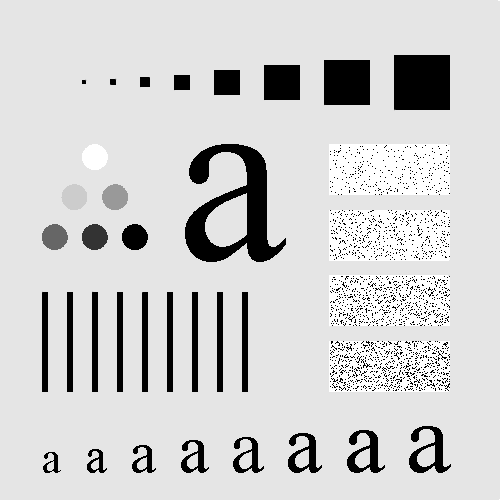


Image after Dilation:


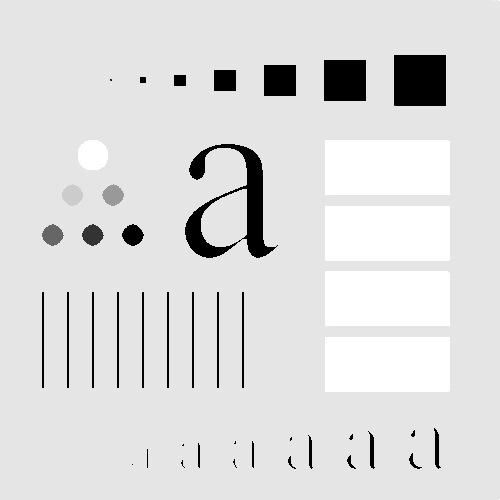


Image after Erosion:


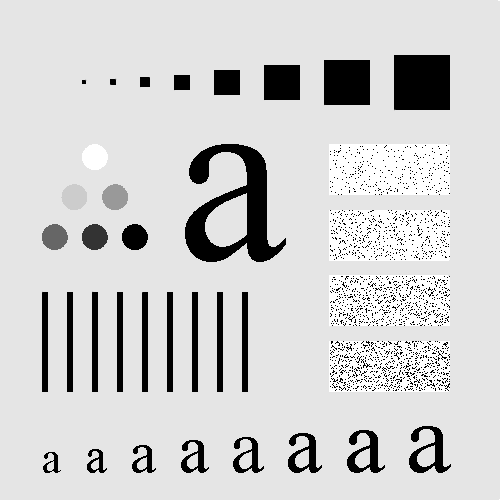

In [0]:
############### Task 3 - dilation and erosion on gray scale images ###############
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('Fig01.tif', 0)
h = int(img.shape[0])
w = int(img.shape[1])
print('Original Image:')
cv2_imshow(img)

#create a structuring element
s_e = np.ones([5,5])
step_h = int(s_e.shape[0])
step_w = int(s_e.shape[1])
dilated = np.copy(img)

#gray-scale dilation
for i in range(0,h-step_h):
  for j in range(0,w-step_w):
    for x in range(0,step_h):
      for y in range(0,step_w):
        s_e[x,y] = dilated[i+x,j+y]
        #print(s_e[x,y])
    sel = np.max(s_e)
    dilated[i,j] = sel

print('\nImage after Dilation:')
cv2_imshow(dilated)

eroded = np.copy(img)

#gray-scale erosion
for i in range(0,h-step_h):
  for j in range(0,w-step_w):
    for x in range(0,step_h):
      for y in range(0,step_w):
        s_e[x,y] = eroded[i+x,j+y]
        #print(s_e[x,y])
    sel = np.min(s_e)
    dilated[i,j] = sel
    #s_e *= 1

print('\nImage after Erosion:')
cv2_imshow(eroded)

Original Image:


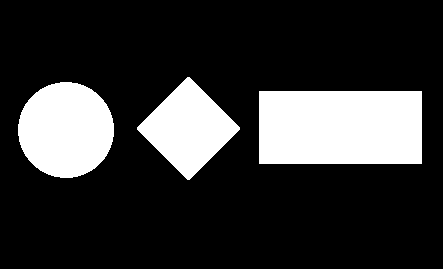


Separating Ellipse: 


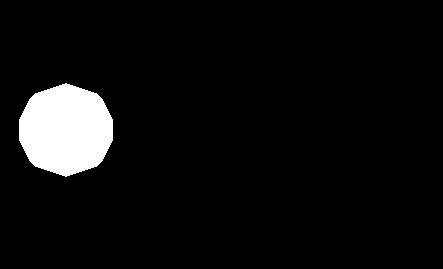


Separating Diamond: 


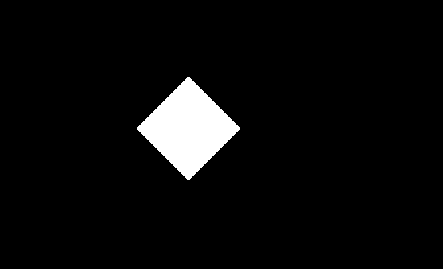


Separating Rectangle: 


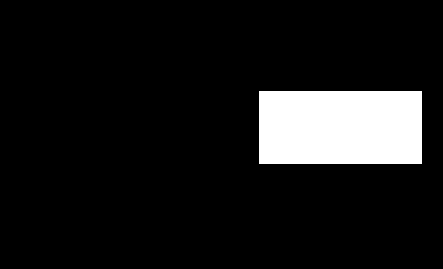

In [0]:
############### Task 4 - separating different shapes ###############
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('Objects.png', 0)
h = int(img.shape[0])
w = int(img.shape[1])
print('Original Image:')
cv2_imshow(img)

#separating ellipse
s_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
elps = cv2.morphologyEx(img, cv2.MORPH_OPEN, s_e, iterations = 10)
print('\nSeparating Ellipse: ')
cv2_imshow(elps)

#sseparating diamond
s_e = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))
dim = cv2.morphologyEx(img, cv2.MORPH_OPEN, s_e, iterations = 12)
print('\nSeparating Diamond: ')
cv2_imshow(dim)

#sseparating rectangle
s_e = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
rect = cv2.morphologyEx(img, cv2.MORPH_OPEN, s_e, iterations = 12)
print('\nSeparating Rectangle: ')
cv2_imshow(rect)